# mrmention 사이트 리뷰분석

 참조사이트
 - https://hyemin-kim.github.io/2020/08/29/E-Python-TextMining-2/

In [7]:
# !pip install matplotlib seaborn sklearn konlpy scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re


In [8]:
df = pd.read_csv('./data/mmention_review_20240109.csv')
df

,name,review,review_date,star,ammen
0,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',한달살기 하면서 날씨도 좋고 모든게 좋았습니다~~단지내에 계시던 주민모두 너무 친절...,2022년 12월,20.0,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...
1,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',"일년을 고민 끝에 떠난 제주도,,,\n자는 곳이 제일 중해서 고심 끝에 결정했습니다...",2022년 12월,20.0,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...
2,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',퇴사하고 퇴직금 털어서 부모님 모시고 다녀왔습니다.\n독채는 신경쓸게 많을 것 같아...,2022년 12월,20.0,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...
3,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',9/1부터 2주간 제주에서 지내기 위해서 정한 스테이입니다. 큰도로에서 좀 들어와 ...,2022년 9월,20.0,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...
4,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',4층이지만 엘리베이터가 있어서 전혀불편함 없이 생활했어요. 스테이상태가 너무좋아서 ...,2022년 6월,20.0,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...
...,...,...,...,...,...
3675,[제주시] 신축풀옵숙소 한달살기 '라온스테이',사실과다른내용이면 고지없이 삭제한다니 마음에들지 않으면 지우겠다는거네요 알아서 ...,2020년 11월,20.0,생활시설 주차장 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락 세면도구 ...
3676,[제주시] 신축풀옵숙소 한달살기 '라온스테이',시외버스터미널과 가까워서 제주 어디로든 대중교통을 이용해 이동하기 편해요. 방도 두...,2022년 11월,16.0,생활시설 주차장 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락 세면도구 ...
3677,[제주시] 신축풀옵숙소 한달살기 '라온스테이',일반 원투룸형 숙소로 공항에서 가깝고 주차도 편리하다.. 주택가라 조용해서 좋았는데...,2022년 9월,16.0,생활시설 주차장 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락 세면도구 ...
3678,[제주시] 신축풀옵숙소 한달살기 '라온스테이',공항에서 택시비 5000원도 안나와요 \r\n도착첫날이나 마지막날 이용하기 좋아요\...,2022년 6월,16.0,생활시설 주차장 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락 세면도구 ...


In [9]:
df['star'] = df['star'].apply(lambda x: int(x/4))
df.head(3)

,name,review,review_date,star,ammen
0,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',한달살기 하면서 날씨도 좋고 모든게 좋았습니다~~단지내에 계시던 주민모두 너무 친절...,2022년 12월,5,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...
1,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',"일년을 고민 끝에 떠난 제주도,,,\n자는 곳이 제일 중해서 고심 끝에 결정했습니다...",2022년 12월,5,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...
2,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',퇴사하고 퇴직금 털어서 부모님 모시고 다녀왔습니다.\n독채는 신경쓸게 많을 것 같아...,2022년 12월,5,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...


In [10]:
# review 열 결측치 확인
df[df['review'] == 'error']

,name,review,review_date,star,ammen


In [11]:
df['review'][0]

'한달살기 하면서 날씨도 좋고 모든게 좋았습니다~~단지내에 계시던 주민모두 너무 친절 하셨구요~직접 기른 상추,고추 등등 쌈 야채도 챙겨주시고 아이들은 잔디에서 매뚜기 방아깨비 달팽이도 잡고 아주 즐거워 했습니다~단점이라면 마트가 거리가 좀 있는데 치킨같은것도 배달 전부 되고 택배도 잘 받고 보내고 했습니다~~또 가고 싶네요~^^'

### 전처리 시작

In [12]:
def hangul_function(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [13]:
hangul_function(df['review'][0])

'한달살기 하면서 날씨도 좋고 모든게 좋았습니다단지내에 계시던 주민모두 너무 친절 하셨구요직접 기른 상추고추 등등 쌈 야채도 챙겨주시고 아이들은 잔디에서 매뚜기 방아깨비 달팽이도 잡고 아주 즐거워 했습니다단점이라면 마트가 거리가 좀 있는데 치킨같은것도 배달 전부 되고 택배도 잘 받고 보내고 했습니다또 가고 싶네요'

In [14]:
from konlpy.tag import Okt
from collections import Counter

In [15]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(hangul_function(df['review'][0]))
nouns

['달',
 '살기',
 '날씨',
 '모든',
 '주민',
 '모두',
 '친절',
 '직접',
 '상추',
 '고추',
 '등등',
 '쌈',
 '야채',
 '아이',
 '잔디',
 '뚜기',
 '방아깨비',
 '달팽이',
 '잡고',
 '아주',
 '단점',
 '라면',
 '마트',
 '거리',
 '좀',
 '치킨',
 '배달',
 '전부',
 '택배',
 '또']

In [16]:
# 말뭉치 생성
corpus = "".join(df['review'].tolist())

In [17]:
nouns = okt.nouns(hangul_function(corpus))
counter = Counter(nouns)
counter.most_common(10)


[('숙소', 2582),
 ('곳', 1251),
 ('달', 1176),
 ('정말', 1144),
 ('수', 1069),
 ('것', 1018),
 ('사장', 955),
 ('제주', 889),
 ('여행', 881),
 ('동안', 864)]

In [18]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)


[('숙소', 2582),
 ('정말', 1144),
 ('사장', 955),
 ('제주', 889),
 ('여행', 881),
 ('동안', 864),
 ('위치', 838),
 ('주변', 740),
 ('바다', 728),
 ('다음', 718)]

In [19]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [20]:
jeju_stopwords = ['제주', '제주도', '호텔', '리뷰', '숙소', '여행', '트립']
for word in jeju_stopwords:
    stopwords.append(word)


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['review'].tolist())
word_list = vect.get_feature_names_out()
count_list = bow_vect.toarray().sum(axis=0)


d:\song\venvs\project1\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [22]:
word_list = vect.get_feature_names_out()
count_list = bow_vect.toarray().sum(axis=0)

In [24]:
word_count_dict = dict(zip(word_list, count_list))
word_count_dict



{'가가': 3,
 '가게': 44,
 '가격': 290,
 '가구': 54,
 '가기': 91,
 '가까이': 140,
 '가끔': 53,
 '가나': 10,
 '가늠': 2,
 '가능': 26,
 '가도': 25,
 '가동': 3,
 '가드': 1,
 '가득': 31,
 '가든': 11,
 '가라': 10,
 '가락': 1,
 '가량': 3,
 '가려움': 1,
 '가로': 3,
 '가로등': 6,
 '가로수길': 1,
 '가루': 3,
 '가림': 2,
 '가마솥': 2,
 '가면': 101,
 '가바': 2,
 '가방': 4,
 '가보': 7,
 '가분': 1,
 '가사': 1,
 '가성': 144,
 '가세': 2,
 '가스': 36,
 '가스레인지': 2,
 '가스렌지': 3,
 '가스실': 1,
 '가스요금': 2,
 '가스전': 1,
 '가스통': 1,
 '가슴': 4,
 '가습기': 2,
 '가시': 10,
 '가신': 2,
 '가안': 1,
 '가야': 25,
 '가업': 2,
 '가옥': 2,
 '가요': 52,
 '가요제': 1,
 '가용': 2,
 '가우리': 1,
 '가운데': 6,
 '가위': 2,
 '가을': 43,
 '가이드': 21,
 '가이드북': 7,
 '가일': 1,
 '가입': 3,
 '가장': 121,
 '가재': 1,
 '가전': 20,
 '가전제품': 23,
 '가정': 21,
 '가족': 427,
 '가족사진': 23,
 '가지': 119,
 '가지각색': 1,
 '가추': 1,
 '가축': 1,
 '가치': 4,
 '가택': 1,
 '가파도': 3,
 '가파르': 1,
 '가파르긴': 1,
 '가품': 1,
 '각각': 1,
 '각방': 6,
 '각별': 1,
 '각오': 2,
 '각자': 13,
 '각종': 23,
 '간간이': 1,
 '간격': 9,
 '간곳': 1,
 '간다': 44,
 '간단': 1,
 '간만': 5,
 '간물때': 1,
 '간발': 1,
 '간선': 1,
 '간섭': 6,
 '간세': 1

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)


In [26]:
print(tf_idf_vect.shape)

(3680, 6936)


In [27]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])


  (0, 6111)	0.2272617352676176
  (0, 5930)	0.19095792106679327
  (0, 5924)	0.22054764179430372
  (0, 5559)	0.1512796894032381
  (0, 5396)	0.23560134090047638
  (0, 5150)	0.20721107865574995
  (0, 5014)	0.22264409695090473
  (0, 4999)	0.17580266265316685
  (0, 3925)	0.23259240749178312
  (0, 3790)	0.12354327590845425
  (0, 3780)	0.10756812631435526
  (0, 3031)	0.21670135707884444
  (0, 2971)	0.10340903702391342
  (0, 2409)	0.18122641950778437
  (0, 2382)	0.2945530971605069
  (0, 2036)	0.1544386487276447
  (0, 2034)	0.12914161957999876
  (0, 1852)	0.12221539859000485
  (0, 1665)	0.17364065123175254
  (0, 1643)	0.2945530971605069
  (0, 1588)	0.168309979007587
  (0, 1239)	0.2945530971605069
  (0, 1209)	0.14838530038325043
  (0, 937)	0.15758453645131637
  (0, 417)	0.23560134090047638
  (0, 200)	0.11585138827799571


In [28]:
vect.vocabulary_

{'살기': 2971,
 '날씨': 937,
 '모든': 2036,
 '주민': 5396,
 '모두': 2034,
 '친절': 5930,
 '직접': 5559,
 '상추': 3031,
 '고추': 417,
 '등등': 1588,
 '야채': 3925,
 '아이': 3780,
 '잔디': 4999,
 '뚜기': 1643,
 '방아깨비': 2382,
 '달팽이': 1239,
 '잡고': 5014,
 '아주': 3790,
 '단점': 1209,
 '라면': 1665,
 '마트': 1852,
 '거리': 200,
 '치킨': 5924,
 '배달': 2409,
 '전부': 5150,
 '택배': 6111,
 '고민': 383,
 '제일': 5293,
 '고심': 394,
 '결정': 287,
 '결론': 283,
 '동네': 1471,
 '집도': 5598,
 '마음': 1831,
 '퇴사': 6177,
 '퇴직금': 6186,
 '부모님': 2651,
 '모시': 2046,
 '신경': 3613,
 '스테이': 3495,
 '주변': 5400,
 '편의': 6319,
 '시설': 3559,
 '일부': 4854,
 '근처': 695,
 '식당': 3590,
 '흑심': 6916,
 '부원': 2662,
 '뚝배기': 1649,
 '부터': 2675,
 '주간': 5378,
 '위해': 4542,
 '도로': 1396,
 '위치': 4539,
 '애월협재곽': 3903,
 '해수욕장': 6622,
 '다만': 1153,
 '한림': 6546,
 '공원': 477,
 '애월': 3895,
 '해안': 6624,
 '생각': 3068,
 '정원': 5248,
 '금오름': 715,
 '새별오름': 3051,
 '상태': 3035,
 '그릇': 675,
 '냄비': 1003,
 '주방': 5397,
 '구비': 573,
 '이불': 4712,
 '친정엄마': 5932,
 '자마자': 4950,
 '걸레': 245,
 '청소': 5762,
 '넷플릭스': 1031,
 '인터넷

In [29]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')


{2971: '살기', 937: '날씨', 2036: '모든', 5396: '주민', 2034: '모두', 5930: '친절', 5559: '직접', 3031: '상추', 417:...


### 감정분류

<Axes: >

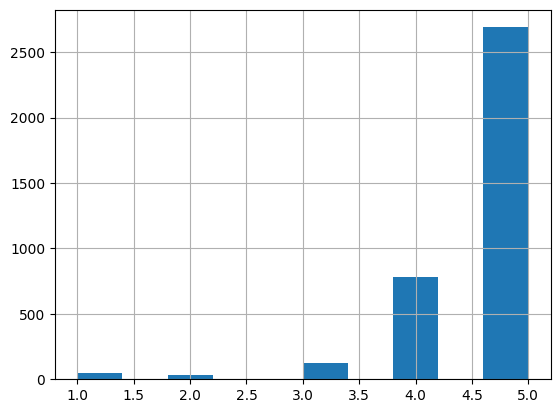

In [31]:
df['star'].hist()

In [32]:
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0
    
df['y'] = df['star'].apply(lambda x: rating_to_label(x))

In [33]:
df.head()

,name,review,review_date,star,ammen,y
0,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',한달살기 하면서 날씨도 좋고 모든게 좋았습니다~~단지내에 계시던 주민모두 너무 친절...,2022년 12월,5,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,1
1,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',"일년을 고민 끝에 떠난 제주도,,,\n자는 곳이 제일 중해서 고심 끝에 결정했습니다...",2022년 12월,5,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,1
2,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',퇴사하고 퇴직금 털어서 부모님 모시고 다녀왔습니다.\n독채는 신경쓸게 많을 것 같아...,2022년 12월,5,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,1
3,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',9/1부터 2주간 제주에서 지내기 위해서 정한 스테이입니다. 큰도로에서 좀 들어와 ...,2022년 9월,5,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,1
4,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',4층이지만 엘리베이터가 있어서 전혀불편함 없이 생활했어요. 스테이상태가 너무좋아서 ...,2022년 6월,5,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,1


In [35]:
df["y"].value_counts()

y
1    3474
0     206
Name: count, dtype: int64

### Training set / Test set 나누기

In [36]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [37]:
x_train.shape, y_train.shape

((2576, 6936), (2576,))

In [38]:
x_test.shape, y_test.shape

((1104, 6936), (1104,))

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [40]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))



accuracy: 0.94
precision: 0.94
recall: 1.00
F1: 0.97


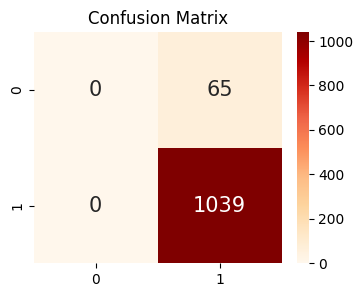

In [41]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [42]:
df['y'].value_counts()

y
1    3474
0     206
Name: count, dtype: int64

In [43]:
positive_random_idx = df[df['y']==1].sample(206, random_state=12).index.tolist()
negative_random_idx = df[df['y']==0].sample(206, random_state=12).index.tolist()



In [44]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)



In [45]:
x_train.shape, y_train.shape

((309, 6936), (309,))

In [46]:
x_test.shape, y_test.shape

((103, 6936), (103,))

In [47]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)


In [48]:
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))



accuracy: 0.83
precision: 0.75
recall: 0.96
F1: 0.84


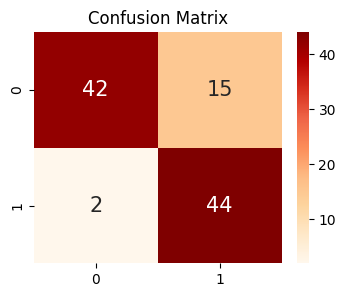

In [49]:
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()


In [50]:
# 긍부정 키워드

In [51]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index


[(1.1321959758833313, 5228),
 (0.863565071999937, 1497),
 (0.849366170995548, 1174),
 (0.8131363120016205, 2244),
 (0.7769729546478652, 2924),
 (0.7444177910236593, 3794),
 (0.7420127382886041, 64),
 (0.6760534635334663, 4976),
 (0.6358988920850155, 1831),
 (0.6105372799534456, 5400),
 (0.6059083571349038, 1221),
 (0.5853160567951597, 223),
 (0.5830716234520358, 117),
 (0.5743925562499473, 6773),
 (0.5740498263397641, 3790),
 (0.512871916313887, 5288),
 (0.5112690670444275, 2369),
 (0.4798203019283433, 1055),
 (0.47774889610484583, 3644),
 (0.47035100198858026, 2365),
 (0.46507175023314856, 5846),
 (0.4616361961056516, 6407),
 (0.46025963145444326, 2964),
 (0.4598060040693118, 5443),
 (0.45417196778953955, 4679),
 (0.4432224097391957, 2981),
 (0.44097523913695025, 2112),
 (0.43091454480345787, 5925),
 (0.42213486356899804, 398),
 (0.42074573722635117, 5092),
 (0.42062713508962984, 4370),
 (0.41014202590155574, 1161),
 (0.4095620970804139, 465),
 (0.40129044730144775, 5433),
 (0.4012489

In [52]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer


{2971: '살기',
 937: '날씨',
 2036: '모든',
 5396: '주민',
 2034: '모두',
 5930: '친절',
 5559: '직접',
 3031: '상추',
 417: '고추',
 1588: '등등',
 3925: '야채',
 3780: '아이',
 4999: '잔디',
 1643: '뚜기',
 2382: '방아깨비',
 1239: '달팽이',
 5014: '잡고',
 3790: '아주',
 1209: '단점',
 1665: '라면',
 1852: '마트',
 200: '거리',
 5924: '치킨',
 2409: '배달',
 5150: '전부',
 6111: '택배',
 383: '고민',
 5293: '제일',
 394: '고심',
 287: '결정',
 283: '결론',
 1471: '동네',
 5598: '집도',
 1831: '마음',
 6177: '퇴사',
 6186: '퇴직금',
 2651: '부모님',
 2046: '모시',
 3613: '신경',
 3495: '스테이',
 5400: '주변',
 6319: '편의',
 3559: '시설',
 4854: '일부',
 695: '근처',
 3590: '식당',
 6916: '흑심',
 2662: '부원',
 1649: '뚝배기',
 2675: '부터',
 5378: '주간',
 4542: '위해',
 1396: '도로',
 4539: '위치',
 3903: '애월협재곽',
 6622: '해수욕장',
 1153: '다만',
 6546: '한림',
 477: '공원',
 3895: '애월',
 6624: '해안',
 3068: '생각',
 5248: '정원',
 715: '금오름',
 3051: '새별오름',
 3035: '상태',
 675: '그릇',
 1003: '냄비',
 5397: '주방',
 573: '구비',
 4712: '이불',
 5932: '친정엄마',
 4950: '자마자',
 245: '걸레',
 5762: '청소',
 1031: '넷플릭스',
 4827

In [53]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])



정말 1.1321959758833313
동안 0.863565071999937
다음 0.849366170995548
바다 0.8131363120016205
사장 0.7769729546478652
아침 0.7444177910236593
가족 0.7420127382886041
자주 0.6760534635334663
마음 0.6358988920850155
주변 0.6105372799534456
달동 0.6059083571349038
걱정 0.5853160567951597
감사 0.5830716234520358
혼자 0.5743925562499473
아주 0.5740498263397641
제외 0.512871916313887
방문 0.5112690670444275
노을 0.4798203019283433
신축 0.47774889610484583
방도 0.47035100198858026


In [54]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])



곰팡이 -1.1621036274783927
청소 -1.0190282585675803
벌레 -0.8489757181979799
쓰레기 -0.8381862713204293
바퀴벌레 -0.8287258554522695
냄새 -0.8259973734168364
화장실 -0.8078996626646535
참고 -0.7691470792160031
관리 -0.7688277121867466
가격 -0.7575832332988821
그냥 -0.7045088483658558
소음 -0.6730371969355637
소리 -0.6700273668762713
사용 -0.6345329388883009
숙박 -0.6140745541106215
바닥 -0.6092033212859498
방충 -0.5873496677280436
침대 -0.5655872836522181
거의 -0.561962880624111
위생 -0.5426783529998863
